In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from graphing import get_sim, get_pops, graph, hist, savefig, fish_tumour, fish_CTL, hist_from_state
import numpy as np
plt.rcParams["figure.figsize"] = (6, 6)

In [3]:
sim = get_sim("../sim_data/sim.pickle")

Successfully opened the previous simulation.


<module 'matplotlib.pyplot' from 'c:\\Users\\akesh\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

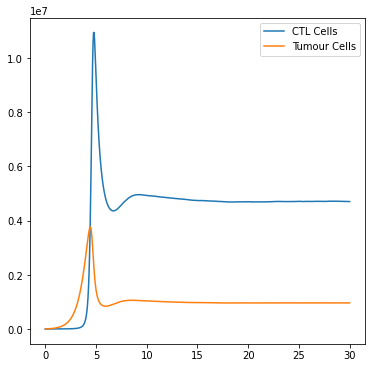

In [61]:
graph(sim)

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from discrete_model import Simulation
from graphing import get_bundle
import pandas as pd

def fish(sim: Simulation, bundle_name):
    from pyfish import fish_plot, process_data, setup_figure
    import matplotlib.pyplot as plt

    if sim.history.state_init_type == "detailed":
        bundles = [get_bundle(state, bundle_name) for state in sim.history]
        populations = []
        phenotypes = set()
        for step in range(len(bundles)):
            bundle = bundles[step]
            for phenotype, pop in bundle.cells_at_phenotype.items():
                populations.append([phenotype.id, step, pop])
                phenotypes.add(phenotype.id)
        populations_df = pd.DataFrame(
            np.array(populations), columns=["Id", "Step", "Pop"]
        )
        parent_tree = []
        """
        We need to construct the parent tree. I'm not sure quite how this works with mutations, since the parent could be any from the left/ right.
        This means no phenotypes have no parents.. And hmm, one phenotype can have multiple phenotypes.
        To generate this, I'd want to collect all present phenotypes, then order chronologically, and assign parents in descending order.
        """
        ordered_phenotypes = list(phenotypes)
        ordered_phenotypes.sort()
        parent = None
        child = None
        for i in range(len(ordered_phenotypes)):
            child = ordered_phenotypes[i]
            if parent is not None:
                parent_tree.append([parent, child])
            parent = child
        parent_tree_df = pd.DataFrame(
            np.array(parent_tree), columns=["ParentId", "ChildId"]
        )
        data = process_data(populations_df, parent_tree_df)
        setup_figure(width=1000,height=500)
        fish_plot(*data)
        return plt

Successfully opened the previous simulation.


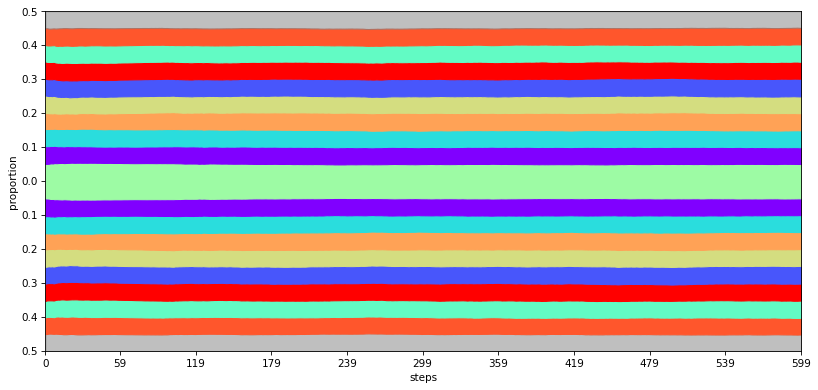

In [50]:
seq_sim = get_sim("../sim_data/sim_FasterSequenceTest2.pickle")
plot = fish(seq_sim, "tumour")
plot.show()

This is a purely straight/ standard fish plot. Why so?

Successfully opened the previous simulation.


<module 'matplotlib.pyplot' from 'c:\\Users\\akesh\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

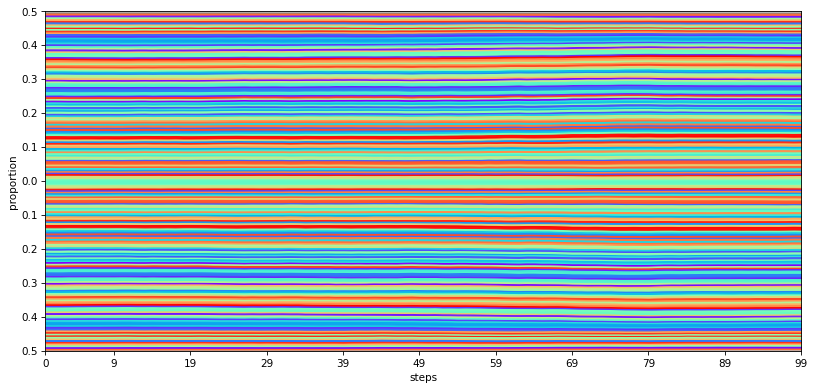

In [6]:
lat_sim = get_sim("../sim_data/sim_Lattice.pickle")
fish(lat_sim, "CTL")

Successfully opened the previous simulation.


<module 'matplotlib.pyplot' from 'c:\\Users\\akesh\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

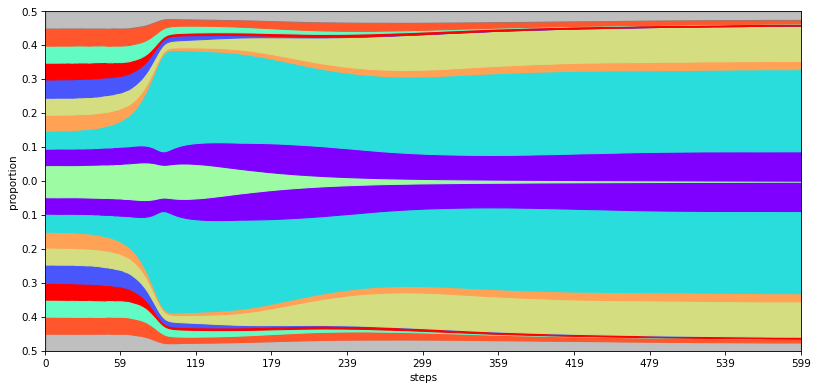

In [52]:
sim = get_sim("../sim_data/sim.pickle")
fish(sim, "CTL")

<module 'matplotlib.pyplot' from 'c:\\Users\\akesh\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

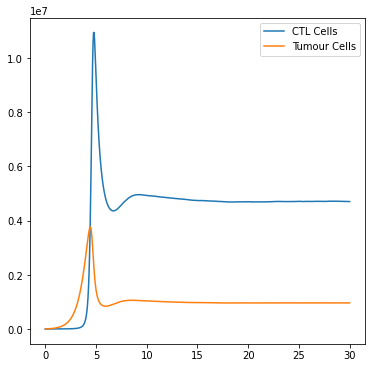

In [59]:

graph(sim)

<module 'matplotlib.pyplot' from 'c:\\Users\\akesh\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

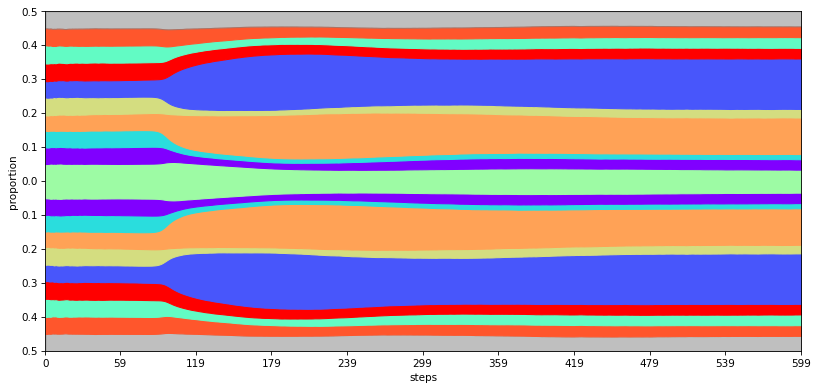

In [62]:
fish(sim, "tumour")

<module 'matplotlib.pyplot' from 'c:\\Users\\akesh\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

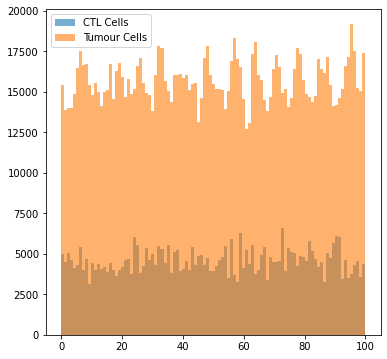

In [7]:

from graphing import hist_base

hist_base(lat_sim.tumour_cells, lat_sim.CTL_cells, lat_sim.CTL_cells.phen_struct)

(array([2.385210e+05, 9.960500e+04, 1.883000e+03, 5.646200e+04,
        2.100000e+01, 9.795130e+05, 2.259830e+05, 2.278523e+06,
        8.122290e+05, 1.378100e+04]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

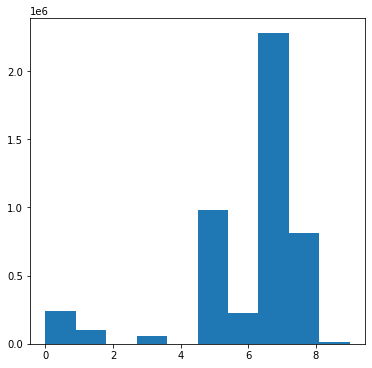

In [66]:
from graphing import flatten_dict

phens = flatten_dict(sim.CTL_cells.cells_at_phenotype)
phen_ids = [phen.id for phen in phens]
plt.hist(phen_ids)

We want to cluster similar points, and place similar clusters together

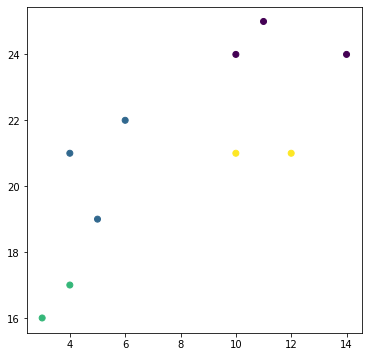

In [26]:
# The example from w3

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

In [27]:
labels

array([1, 1, 0, 2, 2, 0, 0, 1, 3, 3], dtype=int64)

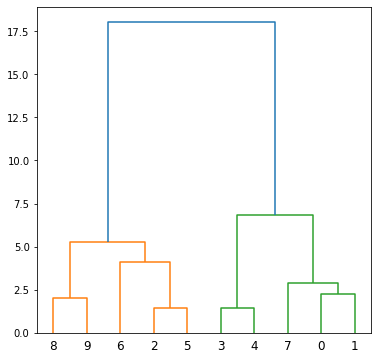

In [10]:
# Sci-py implementation (closer to what we want)

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

In [12]:
linkage_data

array([[ 2.        ,  5.        ,  1.41421356,  2.        ],
       [ 3.        ,  4.        ,  1.41421356,  2.        ],
       [ 8.        ,  9.        ,  2.        ,  2.        ],
       [ 0.        ,  1.        ,  2.23606798,  2.        ],
       [ 7.        , 13.        ,  2.88675135,  3.        ],
       [ 6.        , 10.        ,  4.0824829 ,  3.        ],
       [12.        , 15.        ,  5.26624471,  5.        ],
       [11.        , 14.        ,  6.86051504,  5.        ],
       [16.        , 17.        , 18.02775638, 10.        ]])

In [13]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances
import Levenshtein

# Simple data (sample genome string).
data = ["ACCTCCTAGAAG", "ACCTACTAGAAGTT", "GAATATTAGGCCGA"]

# Custom distance metric and use editdistance.
def lev_metric(x, y):
    return int(Levenshtein.distance(data[int(x[0])], data[int(y[0])]))

# Reshape the data.
X = np.arange(len(data)).reshape(-1, 1)
print(X.shape)

# Calculate pairwise distances with the new metric.
m = pairwise_distances(X, X, metric=lev_metric)
print(m)

# Perform agglomerative clustering.
# The affinity is precomputed (since the distance are precalculated).
# Use an 'average' linkage. Use any other apart from  'ward'.
agg = AgglomerativeClustering(n_clusters=2, affinity='precomputed',
                              linkage='average')

# Use the distance matrix directly.
u = agg.fit_predict(m)
print(u)

(3, 1)
[[0. 3. 9.]
 [3. 0. 9.]
 [9. 9. 0.]]
[0 0 1]


In [23]:
agg.n_leaves_
agg.compute_full_tree

'auto'

In [16]:
Levenshtein.distance(data[0], data[2])

9

In [31]:
sim = get_sim("../sim_data/sim.pickle")

Successfully opened the previous simulation.


<module 'matplotlib.pyplot' from 'c:\\Users\\akesh\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

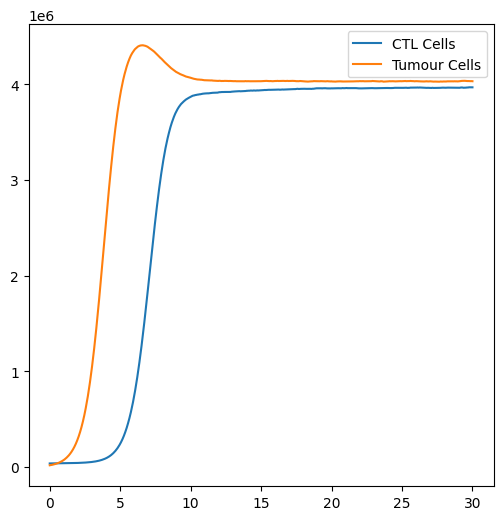

In [32]:
graph(sim)

<module 'matplotlib.pyplot' from 'c:\\Users\\akesh\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

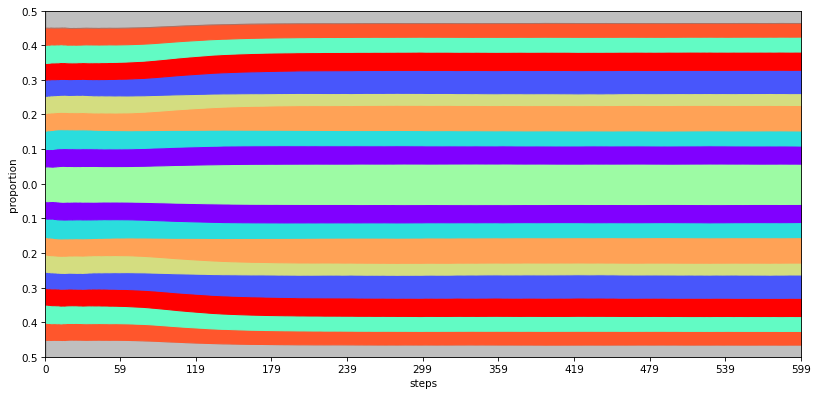

In [33]:
fish(sim, "tumour")

<module 'matplotlib.pyplot' from 'c:\\Users\\akesh\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

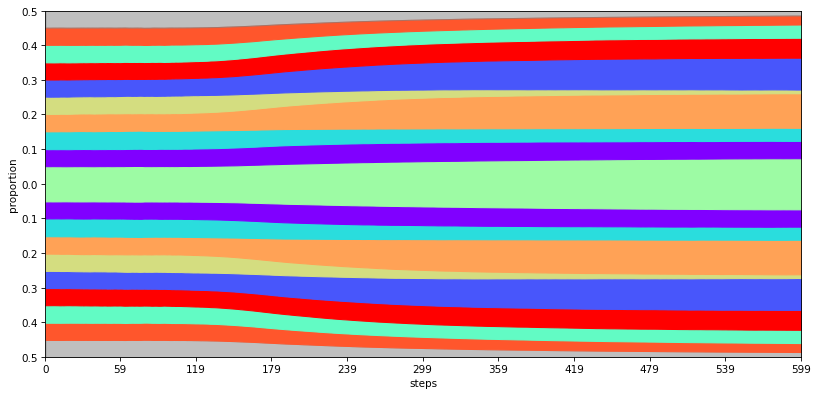

In [34]:
fish(sim, "CTL")